In [1]:
import requests
import berserk
import chessdotcom
from stockfish import Stockfish
import chess
import chess.pgn
import io
import chess.engine
import os
import pandas as pd
import random
import numpy as np

In [102]:
stockfish = Stockfish()

In [237]:
def get_titled_tuesday_matches():
    all_games = []
    usernames = []
    blitz_leaderboard = chessdotcom.client.get_leaderboards().json['leaderboards']['live_blitz']
    for name in blitz_leaderboard:
        usernames.append(name['username'])
    for name in usernames:
        games = chessdotcom.client.get_player_game_archives(username = name)
        recent_games = requests.get(games.json['archives'][-1]).json()['games']
        for game in recent_games:
            if(game['time_control'] != '180'):
                continue
            if(game['white']['username'] != name):
                try:
                    other_title = chessdotcom.client.get_player_profile(username = game['white']['username']).json['player']['title']
                except KeyError:
                    other_title = 'None'
            else:
                try:
                    other_title = chessdotcom.client.get_player_profile(username = game['black']['username']).json['player']['title']
                except KeyError:
                    other_title = 'None'
            if(other_title == 'None'):
                continue
            all_games.append(game['pgn'])
    return all_games
            
                
        
        

In [819]:
def create_df():
    engine = chess.engine.SimpleEngine.popen_uci("/opt/homebrew/Cellar/stockfish/15/bin/stockfish")
    df = pd.DataFrame()
    stockfish = []
    move_num = []
    white_time = []
    black_time = []
    white_name = []
    black_name = []
    white_elo = []
    black_elo = []
    result = []
    to_move = []
    games = chessdotcom.client.get_tournament_round(url_id= 'late-titled-tuesday-blitz-august-02-2022-3288264/11', round_num = 1).json['tournament_round']['games']
    games2 = chessdotcom.client.get_tournament_round(url_id= 'early-titled-tuesday-blitz-august-02-2022-3288263/11', round_num = 1).json['tournament_round']['games']
    count = 0
    for one_game in games:
        pgn = io.StringIO(one_game['pgn'])
        game = chess.pgn.read_game(pgn)
        if 'agreement' in game.headers['Termination']:
            continue
        w_name =(game.headers['White'])
        b_name = (game.headers['Black'])
        w_elo = (game.headers['WhiteElo'])
        b_elo = (game.headers['BlackElo'])
        game_result =(game.headers['Result'])
        moves = 0
        move_num.append(moves)
        white_time_move = 180
        black_time_move = 180
        white_time.append(white_time_move)
        black_time.append(black_time_move)
        to_move.append('white')
        stockfish.append(40)
        result.append(game_result)
        white_name.append(w_name)
        black_name.append(b_name)
        white_elo.append(w_elo)
        black_elo.append(b_elo)
        moves = moves + 1
        
        while not game.is_end():
            node = game.variations[0]
            if (moves % 2 == 0):
                black_time_move = float(node.clock())
            else:
                white_time_move = float(node.clock())
            board = game.board() #print the board if you want, to make sure
            fen = board.fen()
            if(random.random() < .1):
                move_num.append(moves)
                result.append(game_result)
                white_name.append(w_name)
                black_name.append(b_name)
                white_elo.append(w_elo)
                black_elo.append(b_elo)
                stockfish.append((engine.analyse(chess.Board(fen), chess.engine.Limit(time = .075))['score'].white().score()))
                white_time.append(white_time_move)
                black_time.append(black_time_move)
                if(moves % 2 == 0):
                    to_move.append("white")
                else:
                    to_move.append("black")
            game = node
            moves = moves+1
    
        count = count + 1
        print(count)
    for one_game in games2:
        pgn = io.StringIO(one_game['pgn'])
        game = chess.pgn.read_game(pgn)
        if 'agreement' in game.headers['Termination']:
            continue
        w_name =(game.headers['White'])
        b_name = (game.headers['Black'])
        w_elo = (game.headers['WhiteElo'])
        b_elo = (game.headers['BlackElo'])
        game_result =(game.headers['Result'])
        moves = 0
        move_num.append(moves)
        white_time_move = 180
        black_time_move = 180
        white_time.append(white_time_move)
        black_time.append(black_time_move)
        to_move.append('white')
        stockfish.append(40)
        result.append(game_result)
        white_name.append(w_name)
        black_name.append(b_name)
        white_elo.append(w_elo)
        black_elo.append(b_elo)
        moves = moves + 1
        
        while not game.is_end():
            node = game.variations[0]
            if (moves % 2 == 0):
                black_time_move = float(node.clock())
            else:
                white_time_move = float(node.clock())
            board = game.board() #print the board if you want, to make sure
            fen = board.fen()
            if(random.random() < .1):
                move_num.append(moves)
                result.append(game_result)
                white_name.append(w_name)
                black_name.append(b_name)
                white_elo.append(w_elo)
                black_elo.append(b_elo)
                stockfish.append((engine.analyse(chess.Board(fen), chess.engine.Limit(time = .15))['score'].white().score()))
                white_time.append(white_time_move)
                black_time.append(black_time_move)
                if(moves % 2 == 0):
                    to_move.append("white")
                else:
                    to_move.append("black")
            game = node
            moves = moves+1
    
        count = count + 1
        print(count)
    df['white_name'] = white_name
    df['black_name'] = black_name
    df['white_elo'] = white_elo
    df['black_elo'] = black_elo
    df['result'] = result
    df['stockfish'] = stockfish
    df['move_num'] = move_num
    df['white_time'] = white_time
    df['black_time'] = black_time
    df['to_move'] = to_move
    return df
                
                         
                        
        


In [822]:
def white_time(row):
    if row['to_move'] == 'white':
        return row['white_time']
    else:
        return row['black_time']
def black_time(row):
    if row['to_move'] == 'black':
        return row['white_time']
    else:
        return row['black_time']
def result_encode(row):
    if row['result'] == '1-0':
        return 2
    elif row['result'] == '0-1':
        return 0
    else:
        return 1

df['to_move_time'] = df.apply(white_time, axis=1)
df['opp_time'] = df.apply(black_time, axis=1)
df['encoded_result'] = df.apply(result_encode, axis = 1)

In [719]:
df2['encoded_result'] = df2.apply(result_encode, axis = 1)

In [823]:
df['white_elo'] = pd.to_numeric(df['white_elo'])
df['black_elo'] = pd.to_numeric(df['black_elo'])

In [721]:
x2 = df2[['white_elo', 'black_elo', 'stockfish', 'move_num', 'white_time', 'black_time']]

In [724]:
y2 = df2[['encoded_result']]

In [725]:
Y = pd.concat([Y, y2], ignore_index = True)

In [722]:
X = pd.concat([X, x2], ignore_index = True)

In [726]:
Y

,encoded_result
0,2
1,2
2,2
3,2
4,2
...,...
27516,0
27517,0
27518,0
27519,0


In [832]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

In [824]:
X = df[['white_elo', 'black_elo', 'stockfish', 'white_time', 'black_time']]
Y = df[['encoded_result']]

In [868]:
test_size = .25
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, shuffle = False)


In [886]:
model = XGBClassifier()
params = { 'max_depth': [3],
           'learning_rate': [0.01, .05, .1],
           'n_estimators': [100, 300],
           'colsample_bytree': [0.3, .5],
           'gamma': [0, .1]
         }

clf = GridSearchCV(estimator=model, 
                   param_grid=params,
                   scoring='accuracy', 
                   verbose=3, cv = 5)
clf.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.715 total time=   0.7s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.665 total time=   0.7s
[CV 3/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.652 total time=   0.7s
[CV 4/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.688 total time=   0.7s
[CV 5/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.664 total time=   0.7s
[CV 1/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.725 total time=   2.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.673 total time=   1.9s
[CV 3/5] END colsample_bytree=0.3, gamma=0, learn

[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.680 total time=   0.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.736 total time=   2.5s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.691 total time=   2.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.684 total time=   2.8s
[CV 4/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.719 total time=   3.9s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300;, score=0.682 total time=   2.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.737 total time=   0.9s
[CV 2/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.690 tot

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [887]:
clf.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100}

In [892]:
model = XGBClassifier(colsample_bytree= .5, max_depth = 5, n_estimators = 100, learning_rate = .1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

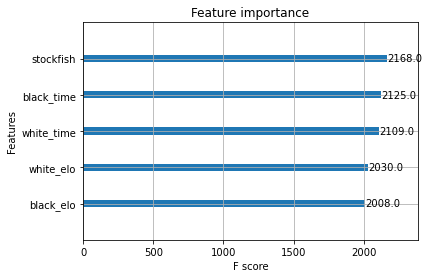

In [827]:
plot_importance(model)

In [747]:
y_train['encoded_result'].value_counts()

2    9901
0    9375
1    2740
Name: encoded_result, dtype: int64

In [893]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [881]:
model.predict_proba(X_test)

array([[0.14062047, 0.13749321, 0.72188634],
       [0.08667517, 0.09583018, 0.8174947 ],
       [0.08133675, 0.12851472, 0.79014856],
       ...,
       [0.8865587 , 0.03334993, 0.08009129],
       [0.8932891 , 0.03360311, 0.07310776],
       [0.9115961 , 0.03429177, 0.05411205]], dtype=float32)

In [692]:
pd.Series(pd.DataFrame(np.array(model.predict_proba(X_test)))[2])

0       0.121404
1       0.124293
2       0.142365
3       0.149143
4       0.109467
          ...   
2492    0.533708
2493    0.595113
2494    0.804016
2495    0.973854
2496    0.974958
Name: 2, Length: 2497, dtype: float32

In [864]:
white = (pd.Series(pd.DataFrame(np.array(model.predict_proba(X_test)))[2]))
draw = (pd.Series(pd.DataFrame(np.array(model.predict_proba(X_test)))[1]))
black = (pd.Series(pd.DataFrame(np.array(model.predict_proba(X_test)))[0]))

In [865]:
X_test = X_test.assign(white=white.values)
X_test = X_test.assign(draw=draw.values)
X_test = X_test.assign(black=black.values)

In [866]:
X_test.tail(60)

,white_elo,black_elo,stockfish,white_time,black_time,white,draw,black
27817,2688,2894,-15.0,5.7,2.4,0.427794,0.165557,0.406649
27818,2688,2894,-11.0,6.3,3.3,0.360202,0.207687,0.432110
27819,2688,2894,-13.0,7.1,2.9,0.371852,0.214405,0.413743
27820,2688,2894,-19.0,7.4,3.1,0.360202,0.207687,0.432110
27821,2688,2894,-15.0,6.8,2.7,0.351370,0.221396,0.427234
27822,2688,2894,-17.0,6.1,2.2,0.428088,0.165671,0.406240
27823,2688,2894,-13.0,6.4,3.0,0.369482,0.213038,0.417480
27824,2688,2894,-19.0,7.0,2.3,0.416991,0.161376,0.421633
27825,2688,2894,-21.0,2.0,3.3,0.287703,0.171021,0.541276
27826,2688,2894,-448.0,2.1,3.3,0.179305,0.124212,0.696483


In [894]:
accuracy = accuracy_score(y_test, predictions)

In [895]:
accuracy

0.633142037302726

In [896]:
log_loss(y_test, model.predict_proba(X_test))

0.8232051862826654

In [846]:
type(X_test.iloc[0])

pandas.core.series.Series

In [856]:
model.predict_proba(np.array(X_test.head(1)))

array([[0.22230807, 0.09929526, 0.67839664]], dtype=float32)

In [855]:
np.array(X_test.head(1))

array([[2288. , 2135. ,  498. ,   86.3,   69.3]])

In [714]:
chessdotcom.client.get_tournament_round(url_id= 'early-titled-tuesday-blitz-august-02-2022-3288263/11', round_num = 1).json['tournament_round']['games']

1571

In [901]:
model.predict_proba(np.array([[2829, 2765, 0, 3.6, 3.1]]))

array([[0.28506163, 0.342225  , 0.3727134 ]], dtype=float32)